# Lecture 1: Introduction to Machine Learning and Artificial Intelligence

# Topics:

1. ML/AI and how they are related
2. The ML pipeline (and what this lecture will cover)
3. Introducing the short course dataset and prediction problem
4. Data exploration and analysis
    - Reading data with pandas
    - Reading data with xarray
    - Data Visualization
5. Data pre-processing
    - Transformations
    - Normalization and Scaling
    - Dimensionality Reduction 
6. Tutorial Data Preparation

## 1. Machine learning (ML) / artificial intelligence (AI) and how they are related

https://mrrajeshrai.com/artificial-intelligence-vs-machine-learning-vs-deep-learning 
<img src="Images/AI-vs-ML-vs-Deep-Learning.png" width="600" align="left">

- AI systems are trained to imitate human behaviors. 
- ML is a subset of AI
- ML models use statistical functions to improve predictive performance after experiencing data


## 2. The ML pipeline

<img src="Images/ml_comic.png" width="300" height="400" align="left">
<br>

- **Problem Definition**: Loading and visualizing your data to see if ML methods are applicable
    - How are the data distributed and how are different variables related
- **Data Pre-processing**: Transforming your data into forms more amenable for ML applications 
- **Data Separation**: Splitting your data into training/validation/testing sets
- **Model Training**: Optimize one or more ML model on your processed data
- **Deployment**: Apply the ML model to testing data the model has not seen
- **Evaluation**: Determine how well the ML model performs
- **Interpretation**: Discover what the ML model has learned about the processed data

#### *We will be covering the first two steps in this lecture*


<br>
<br>

## 3. Introducing the short course dataset and prediction problem

The goal of the problem is to predict the probability of low-level vorticity exceeding a certain threshold given a storm with simulated radar reflectivity > 40 dBZ and the associated surface wind and temperature fields. 

Simulated thunderstorms are from the National Center for Atmospheric Research (NCAR) convection-allowing ensemble (Schwartz et al. 2015).

**Predictor variables (Input fields in the netCDF data):**
- REFL_COM_curr (composite reflectivity)
- U10_curr (10 m west-east wind component in m/s)
- V10_curr (10 m south-north wind component in m/s)
- T2_curr (2 m temperature in Kelvin)

**Label variable (Field we are predicting):**
- RVORT1_MAX_future (hourly maximum vertical vorticity at 1 km Above ground level in s-1)
    
**Other fields of note:**
- time (valid time of storm image)
- i and j (row and column array indices from original WRF model grid)
- x and y (projection coordinates in meters)
- masks (binary grid showing where storm outline is. Aggregate stats in csv file are extracted from only positive grid points in masks)
<br>
<br>

**To make sure our plots show inline:**

In [ ]:
%matplotlib inline

**First we need to import the libraries used in the following sections.**

In [59]:
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np
import os
from netCDF4 import Dataset
import matplotlib
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf 
import cartopy
import xarray as xr

## 4. Data exploration and analysis

## Reading CSV files using pandas

***We use glob to find all files ending in ".csv" and save them in a sorted list*** 

In [13]:
#Set "csv_path" to the location of the "data" folder.
csv_path =".../data/track_data_ncar_ams_3km_csv_small/"
print(csv_path)

#Find all files in folder that end in ".csv"
csv_files = sorted(glob(csv_path+"*.csv"))
print('Number of csv files: {0}'.format(len(csv_files)))

/Users/aburk/Documents/ams-2020-ml-python-course/data/track_data_ncar_ams_3km_csv_small/
Number of csv files: 100


***How to read in all of the CSV files to one pandas dataframe***

The following method opens all of the files saved in "csv_files", reads the data, and concatenates them together along their common columns. The first column, usually titled "unknown" is ignored.

In [14]:
#Use "map" to read multiple files and concatenate the dataframes
csv_all_files = pd.concat(map(
                        pd.read_csv, csv_files), 
                        ignore_index=True)

#Print the number of total samples from all files found
print('Number of samples: {0}'.format(len(csv_all_files)))

Number of samples: 121137


***How to determine variables in a dataframe***

We print out the column headers of the dataframe to identify which variables the file contains and what we want to further explore. 

In [15]:
#Print out column headers
print(csv_all_files.columns)

Index(['Step_ID', 'Track_ID', 'Ensemble_Name', 'Ensemble_Member', 'Run_Date',
       'Valid_Date', 'Forecast_Hour', 'Valid_Hour_UTC', 'Duration',
       'Centroid_Lon', 'Centroid_Lat', 'Centroid_X', 'Centroid_Y',
       'Storm_Motion_U', 'Storm_Motion_V', 'REFL_COM_mean', 'REFL_COM_max',
       'REFL_COM_min', 'REFL_COM_std', 'REFL_COM_percentile_10',
       'REFL_COM_percentile_25', 'REFL_COM_percentile_50',
       'REFL_COM_percentile_75', 'REFL_COM_percentile_90', 'U10_mean',
       'U10_max', 'U10_min', 'U10_std', 'U10_percentile_10',
       'U10_percentile_25', 'U10_percentile_50', 'U10_percentile_75',
       'U10_percentile_90', 'V10_mean', 'V10_max', 'V10_min', 'V10_std',
       'V10_percentile_10', 'V10_percentile_25', 'V10_percentile_50',
       'V10_percentile_75', 'V10_percentile_90', 'T2_mean', 'T2_max', 'T2_min',
       'T2_std', 'T2_percentile_10', 'T2_percentile_25', 'T2_percentile_50',
       'T2_percentile_75', 'T2_percentile_90', 'RVORT1_MAX-future_mean',
       'RVOR

***How to look at the first five samples of a dataframe for a given set of variables***

Now that we know the specific column names, we can analyze a few variables and their values.

In [16]:
#Subset the csv files using ".loc". Look at all rows and the three specified columns
samples = csv_all_files.loc[:,['U10_percentile_50', 'V10_percentile_50', 'T2_percentile_50']]

#Print the first five rows of the selected columns
samples.head()

,U10_percentile_50,V10_percentile_50,T2_percentile_50
0,0.27611,4.78568,293.17340
1,-1.08810,5.65116,291.98325
2,-0.36890,2.77814,293.00183
3,1.39530,1.29246,292.66022
4,0.61899,4.36524,292.27325


***How to look at the last five samples***

In [17]:
#Print the last five rows of the selected columns
samples.tail()

,U10_percentile_50,V10_percentile_50,T2_percentile_50
121132,-8.93498,-1.34876,273.58032
121133,-8.69047,-0.05067,272.04858
121134,-7.48825,-2.31438,272.70273
121135,-7.72428,-0.19983,272.97089
121136,4.35046,3.11395,274.59232


***How to subset a dataframe*** 

There are multiple different ways to pull out specific values from a pandas dataframe. 

**Using variable names**

In [18]:
#Subset the csv files based on row indices and a column name

#Subsetting with an inclusive last row
sliced_by_name_inclusive = csv_all_files.loc[100:105, 'U10_percentile_50']
print('Inclusive last sample \n{0}'.format(sliced_by_name_inclusive))

#Subsetting with an exclusive last row
sliced_by_name_exclusive = csv_all_files['U10_percentile_50'][100:105]
print('\nExclusive last sample \n{0}'.format(sliced_by_name_exclusive))

Inclusive last sample 
100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
105    0.76290
Name: U10_percentile_50, dtype: float64

Exclusive last sample 
100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
Name: U10_percentile_50, dtype: float64


**Using variable indices**

In [21]:
#Subsetting based on indices values using ".iloc"
sliced_by_index = csv_all_files.iloc[100:105, 30]
print(sliced_by_index)

100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
Name: U10_percentile_50, dtype: float64


# Main takeaway: Pay attention to exclusivity when subsetting using pandas

Once we have the desired variables selected it's easy to perform basic mathematical functions. 

***How to apply mathematical functions in pandas***

In [23]:
#Find mean, max, and standard deviation
print('Mean:', 
      sliced_by_name_inclusive.mean())
print('Max:',
      sliced_by_name_inclusive.max())
print('Standard Deviation:', 
      sliced_by_name_inclusive.std())

Mean: -0.5204433333333333
Max: 2.75208
Standard Deviation: 2.9678617189260463


<br>
<br>
<br>

## Reading netCDF4 files using xarray


***First we will use glob to find all files ending in ".nc" and save them in a sorted list*** 

In [50]:
#Set "nc_path" to the location of the "data" folder.
nc_path = ".../data/track_data_ncar_ams_3km_nc_small/"
print(nc_path)

#Find all files in folder that end in ".nc"
nc_files = sorted(glob(nc_path+'*.nc'))
print('Number of netcdf files:',len(nc_files))

/Users/aburk/Documents/ams-2020-ml-python-course/data/track_data_ncar_ams_3km_nc_small/
Number of netcdf files: 100


***How to read in all the netCDF files and save them to one xarray dataset***

Xarray is different from pandas in that multiple datasets can be opened and read through one function. Also, the function can read the data in chunks for more efficient processes. 

In [25]:
#Reading netCDF patches in chunks of 100
mxf = xr.open_mfdataset(nc_files,combine='by_coords',chunks={'p':100})
mxf

<xarray.Dataset>
Dimensions:            (col: 32, p: 1148, row: 32)
Coordinates:
  * col                (col) int32 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * row                (row) int32 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * p                  (p) int64 0 1 2 3 4 5 6 ... 1142 1143 1144 1145 1146 1147
Data variables:
    lon                (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    lat                (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    i                  (p, row, col) int32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    j                  (p, row, col) int32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    x                  (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    y                  (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    masks              (p, row, col) int32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    time               (p) datetime64[ns] dask.array<chunksize=(100,), meta=np.ndarray>
    centroid_lon       (p) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    centroid_lat       (p) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    centroid_i         (p) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    centroid_j         (p) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    track_id           (p) int32 dask.array<chunksize=(100,), meta=np.ndarray>
    track_step         (p) int32 dask.array<chunksize=(100,), meta=np.ndarray>
    REFL_COM_curr      (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    U10_curr           (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    V10_curr           (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    T2_curr            (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    RVORT1_MAX_future  (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    HAIL_MAXK1_future  (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.6
    title:            NCARSTORM Storm Patches for run 20101024-0000 member d01
    object_variable:  REFL_COM

**Benefits of using xarray**

1. Differing from reading in data using netCDF4.Dataset, the dimensions are labeled, making subetting easier.
2. xarray integrates numpy and pandas for reading multidimensional data
3. Application of dask when with xarray allows for better parallelization

***How to look at specific parts of a dataset***

First we can explore the dataset variables

In [26]:
#Print the variables within the xarray dataset
mxf.data_vars

Data variables:
    lon                (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    lat                (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    i                  (p, row, col) int32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    j                  (p, row, col) int32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    x                  (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    y                  (p, row, col) float32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    masks              (p, row, col) int32 dask.array<chunksize=(100, 32, 32), meta=np.ndarray>
    time               (p) datetime64[ns] dask.array<chunksize=(100,), meta=np.ndarray>
    centroid_lon       (p) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    centroid_lat       (p) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    centroid_i         (p) float32 dask.array<chunksiz

We can reference back to specific variables within an xarray object as well as the dimensions, coordinates, and attributes of the variable. 

In [27]:
#Subset dataset by a specific variable
u_10_meter = mxf['U10_curr']

#Output the dimensions, coordinates, and attributes of a single variable
print ("Dimensions:",u_10_meter.dims)
print ("\nCoords:",u_10_meter.coords)
print ("\nAttributes:",u_10_meter.attrs)

Dimensions: ('p', 'row', 'col')

Coords: Coordinates:
  * col      (col) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
  * row      (row) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
  * p        (p) int64 0 1 2 3 4 5 6 7 ... 1141 1142 1143 1144 1145 1146 1147

Attributes: {'long_name': 'U10', 'units': ''}


We can also access a variable as an attribute.

In [28]:
#Subset dataset for a single variable
mxf.U10_curr

<xarray.DataArray 'U10_curr' (p: 1148, row: 32, col: 32)>
dask.array<open_dataset-c60a2c8999ed2fd28724e2b4bcbb6869U10_curr, shape=(1148, 32, 32), dtype=float32, chunksize=(100, 32, 32)>
Coordinates:
  * col      (col) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
  * row      (row) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
  * p        (p) int64 0 1 2 3 4 5 6 7 ... 1141 1142 1143 1144 1145 1146 1147
Attributes:
    long_name:  U10
    units:

***How to subset an xarray dataset***

Subsetting variables in xarray is similar to numpy and pandas. 

In [29]:
#Select first sample
u_10_meter[0,:,:]

<xarray.DataArray 'U10_curr' (row: 32, col: 32)>
dask.array<getitem, shape=(32, 32), dtype=float32, chunksize=(32, 32)>
Coordinates:
  * col      (col) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
  * row      (row) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
    p        int64 0
Attributes:
    long_name:  U10
    units:

**Notice that the patch dimension "p" now only has one coordinate.**

Another method to select a single dimension is to use "isel".

In [30]:
#Select the first sample of the "p" dimension
u_10_meter.isel(p=0)

<xarray.DataArray 'U10_curr' (row: 32, col: 32)>
dask.array<getitem, shape=(32, 32), dtype=float32, chunksize=(32, 32)>
Coordinates:
  * col      (col) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
  * row      (row) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
    p        int64 0
Attributes:
    long_name:  U10
    units:

We can use "sel" for multidimensional slices.

In [41]:
#Select the first sample of the "p" dimension, and slices of the "row" and "column" dimensions
using_sel_notation = u_10_meter.sel(p=0,row=slice(2,5),col=slice(25,30))
using_slice_notation = u_10_meter[0,2:5,25:30]

print('Using "sel" notation\n\n', using_sel_notation)
print('\n\n\nUsing "slice" notation\n\n', using_slice_notation)

Using "sel" notation

 <xarray.DataArray 'U10_curr' (row: 4, col: 6)>
dask.array<getitem, shape=(4, 6), dtype=float32, chunksize=(4, 6)>
Coordinates:
  * col      (col) int32 25 26 27 28 29 30
  * row      (row) int32 2 3 4 5
    p        int64 0
Attributes:
    long_name:  U10
    units:      



Using "slice" notation

 <xarray.DataArray 'U10_curr' (row: 3, col: 5)>
dask.array<getitem, shape=(3, 5), dtype=float32, chunksize=(3, 5)>
Coordinates:
  * col      (col) int32 25 26 27 28 29
  * row      (row) int32 2 3 4
    p        int64 0
Attributes:
    long_name:  U10
    units:      


## Notice that the slicing notation is exclusive of the col and row dimensions, while using "sel" is inclusive. Another benefit of "sel" is the explicit dimension notation.

If a datapoint is not known, xarray will find the nearest point with the "method" argument.

In [42]:
#Select sample based on approximate dimension values
u_10_meter.sel(p=0.1,row=2.2,col=3.8,method='nearest')

<xarray.DataArray 'U10_curr' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=()>
Coordinates:
    col      int32 4
    row      int32 2
    p        int64 0
Attributes:
    long_name:  U10
    units:

***How to apply mathematical functions in xarray***

In [43]:
#Output the mean, max, and standard deviation of the "p" dimension
print('Mean:\n',u_10_meter.mean(dim='p').values)
print('\nMax:\n',u_10_meter.max(dim='p').values)
print('\nStandard Deviation:\n',u_10_meter.std(dim='p').values)

Mean:
 [[-3.19075   -3.2368271 -3.278512  ... -4.2089367 -4.220905  -4.239361 ]
 [-3.2081819 -3.2610576 -3.3101106 ... -4.2183404 -4.2250295 -4.242539 ]
 [-3.2242923 -3.2820752 -3.3335173 ... -4.22195   -4.241975  -4.257126 ]
 ...
 [-3.51736   -3.5732021 -3.6408029 ... -4.3808393 -4.4212193 -4.4655366]
 [-3.5538058 -3.6072161 -3.6636112 ... -4.36216   -4.406422  -4.4715137]
 [-3.5924418 -3.64502   -3.6792133 ... -4.355662  -4.4014835 -4.467492 ]]

Max:
 [[11.066983 11.338459 13.31417  ... 13.119595 12.750058 11.168697]
 [11.168777 10.706363 11.256745 ... 14.324003 12.429451 11.155299]
 [10.567234 10.698712 10.361871 ... 14.192873 12.871518 10.269581]
 ...
 [12.239425 12.031074 11.661358 ... 10.912283 11.937877 10.79758 ]
 [11.57546  11.519002 11.328221 ... 12.781237 12.568933 10.617296]
 [11.369741 11.114453 10.9717   ... 13.726644 12.175067 12.604885]]

Standard Deviation:
 [[5.225477  5.2372556 5.248325  ... 4.8682513 4.86427   4.8627543]
 [5.2280555 5.22794   5.2279778 ... 4.880929 

<br>
<br>
<br>

##  Data Visualization

We can plot different figures using built-in functions, seaborn, cartopy, and matplotlib. One benefit of seaborn is that it includes a colorblind palette. 

***How to plot data using built-in functions***

Both pandas and xarray come with built-in matplotlib plotting functions to quickly look at the data. 

Text(0.5, 0, 'Sample')

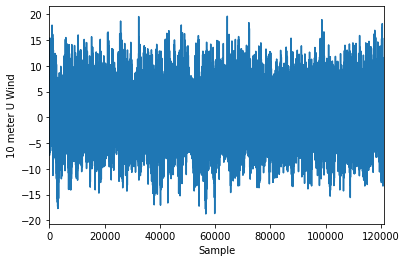

In [44]:
#Subset csv files on variable "U10_percentile_50" and plot the results
csv_all_files['U10_percentile_50'].plot()
plt.ylabel("10 meter U Wind")
plt.xlabel("Sample")

**Xarray will plot the given data based on the shape of its dimensions.**

Shape:
 (32, 32)


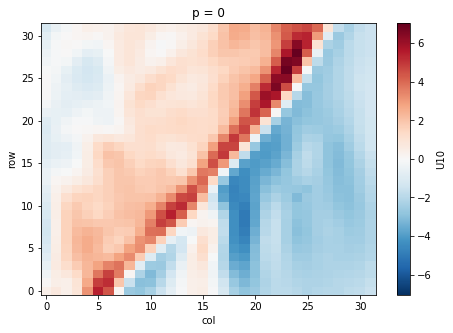

In [47]:
#Subset nc files on variable "U10_curr" and the first "p" dimension, plot the results
data_slice = mxf['U10_curr'].isel(p=0)
print('Shape:\n', np.shape(data_slice))
data_slice.plot(size=5)

Shape:
 (11, 4, 6)


(array([19., 92., 30., 22., 38.,  4.,  1., 16., 18., 24.]),
 array([-7.8749013 , -6.5570483 , -5.239195  , -3.921342  , -2.6034887 ,
        -1.2856355 ,  0.03221769,  1.3500708 ,  2.667924  ,  3.9857771 ,
         5.3036304 ], dtype=float32),
 <a list of 10 Patch objects>)

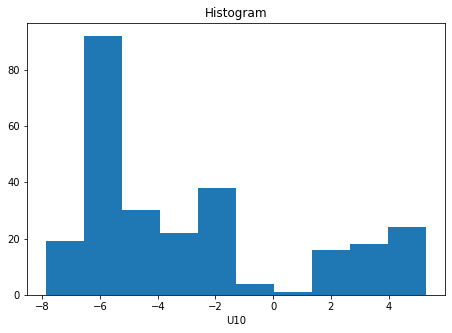

In [51]:
#Subset nc files on variable "U10_curr", slice "p","row" and "column" dimensions, and plot the result
data_slice = mxf['U10_curr'].sel(p=slice(0,10),
               row=slice(2,5),
               col=slice(25,30))
print('Shape:\n', np.shape(data_slice))
data_slice.plot(size=5)

Shape:
 (11,)


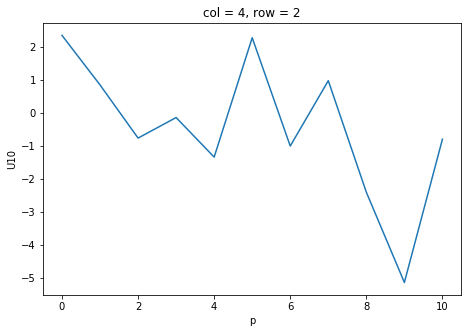

In [52]:
#Subset nc files on variable "U10_curr", slice "p" dimension, and select certain "row" and "column" dimension values
#Plot the result
data_slice = mxf['U10_curr'].sel(p=slice(0,10)).sel(row=2,col=4)
print('Shape:\n', np.shape(data_slice))
data_slice.plot(size=5)

***How to plot data using seaborn***

Let's start by plotting the CSV data with seaborn.

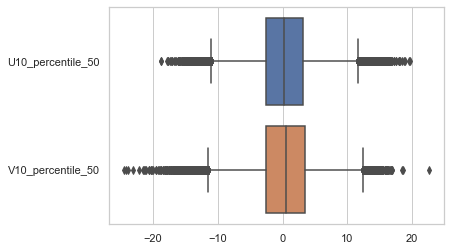

In [53]:
#Subset csv data on variables "U10_percentile_50" and "V10_percentile_50"
seaborn_plotting_data = csv_all_files.loc[:,
                        ['U10_percentile_50','V10_percentile_50']]

#Set the color palette as "colorblind" for inclusivity 
sns.set_palette("colorblind")

#Set the backdrop grid style
sns.set(style="whitegrid")

#Plot a horizontally oriented boxplot 
sns.boxplot(data=seaborn_plotting_data,orient="h")

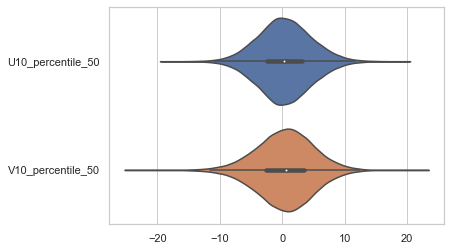

In [54]:
#Plot a horizontally oriented violinplot
sns.violinplot(data=seaborn_plotting_data,orient="h")

We can also plot the netCDF data using seaborn. One interesting way is using a pairplot.

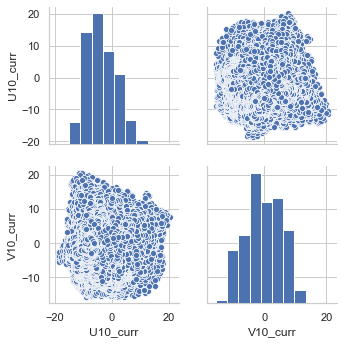

In [55]:
#Convert xarray dataset to pandas dataframe
df = mxf.to_dataframe()
 
#Plot pairplot of variables "U10_curr" and "V10_curr"
sns.pairplot(df.reset_index(), vars=['U10_curr','V10_curr'])

***How to plot data using matplolib***

One plot that can be useful in combining multiple datasets is a quiver plot. We will look at this with the patch data from the netCDF files. 

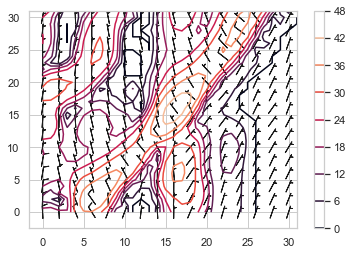

In [56]:
#Set stride and patch variables
stride = 2
patch = 0

#Subset xarray dataset for given variables
v = mxf['V10_curr']
u = mxf['U10_curr']
r = mxf['row']
c = mxf['col']

#Plot contours of nc variable "REFL_COM_curr" on the patch variable dimension
cf = plt.contour(mxf["REFL_COM_curr"].sel(p=patch))

#Plot quiver barbs on subset nc variables, indexing based on stride variable
plt.barbs(r[::stride], 
           c[::stride],
           u.sel(p=patch)[::stride, ::stride], 
           v.sel(p=200)[::stride, ::stride],
           length=5, pivot='middle')

#Plot colorbar of contour plot
plt.colorbar(cf)

***How to plot data using cartopy***

Let's look at the CSV data, plotting the spatial frequency of the hourly maximum vertical vorticity at 1 km above ground level in s$^{-1}$

In [ ]:
#Create figure of specific size
fig = plt.figure(figsize=(8, 4))

#Set up plot projection and features
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.add_feature(cf.LAND)  
ax.add_feature(cf.COASTLINE)   
ax.add_feature(cf.BORDERS.with_scale('50m'),linestyle='-', edgecolor='black')
ax.add_feature(cf.STATES.with_scale('50m'),linestyle='-', edgecolor='black')

#Only plot values where the hourly maximum vertical vorticiy is greater than 0.005
indices = csv_all_files['RVORT1_MAX-future_max'] > 0.005
longitudes = csv_all_files.loc[indices, "Centroid_Lon"].values
latitudes = csv_all_files.loc[indices,"Centroid_Lat"].values

#Plot points as a 2D histogram
sf = ax.hist2d(longitudes, latitudes, bins=30,
               transform=ccrs.PlateCarree(), cmin=1)

#Set the viewable extent, over the CONUS in this instance
ax.set_extent([-125, -66.5, 20, 50],crs=ccrs.PlateCarree())

#Plot colorbar and title
plt.colorbar(sf[-1])
plt.title("Hourly Maximum Vertical Vorticity Spatial Frequency")

Now let's use cartopy to plot the netCDF data.

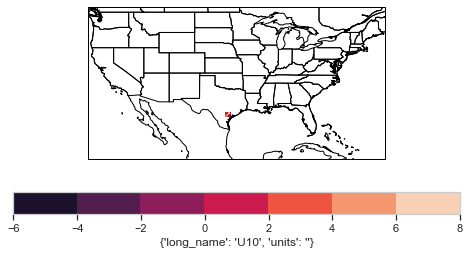

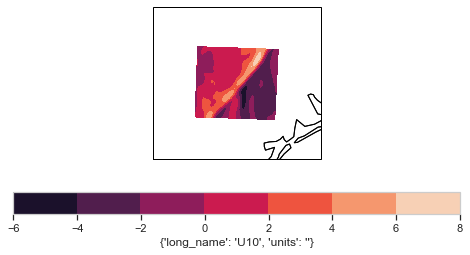

In [60]:
patch = 0 
#zoom factor is how many degrees a zoomed-in box 
#should be in the horizontal and vertical
zoom_factor = 0.5

#Set the viewable extent over the conus and zoomed-in area
conus_extent = [-125, -66.5, 20, 50]
zoomed_extent = [mxf.lon[patch,0,0]-zoom_factor,
                mxf.lon[patch,-1,-1]+zoom_factor,
                mxf.lat[patch,0,0]-zoom_factor,
                mxf.lat[patch,-1,-1]+zoom_factor]

#Create lists of extents
extent_list = [conus_extent,zoomed_extent]

#Create subplots of conus and zoomed in plots
for index, extent in enumerate(extent_list):
    
    #Setup plot projection
    fig = plt.figure(figsize=(8,4))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE.with_scale('50m'))
    ax.add_feature(cf.STATES.with_scale('50m'))
    
    #set extent for the given subplot
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    #contour "U10_curr" variable for a given patch
    cs = plt.contourf(mxf.lon[patch],
                      mxf.lat[patch],
                      mxf.U10_curr[patch],
                      transform=ccrs.PlateCarree())
    
    #Plot colorbar and label with the nc variable attributes
    cbar = plt.colorbar(cs,orientation='horizontal',ax=ax)
    cbar.set_label(mxf.U10_curr.attrs)
    plt.show()
    plt.close()

<br>
<br>
<br>

# 4. Data Pre-processing

## Data Transformations

For these examples, we will use the pandas dataframe object. 

***How to handle Nan values using pandas***

Taking care of missing values is important when pre-processing data to input into ML models. Handling NaN values are easy within a pandas dataframe. First lets add missing values to our dataset.

In [79]:
#Copy pandas dataframe
copied_data = csv_all_files.copy(deep=True)

#Slice dataframe
unknown_sliced_data = copied_data.loc[100:105,'U10_percentile_50']

#Add NaN and inf values
print('Before adding unknown values: \n'+ str(unknown_sliced_data))
unknown_sliced_data[101] = np.nan
unknown_sliced_data[104] = np.inf
print("\nAfter adding unknown values: \n" + str(unknown_sliced_data))

Before adding unknown values: 
100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
105    0.76290
Name: U10_percentile_50, dtype: float64

After adding unknown values: 
100   -1.41053
101        NaN
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64


Two important methods that are useful for handling NaNs are "dropna()" and "fillna()". Choosing a function depends on the dataset and problem definition.

In [72]:
#Drop any NaN values
print('Dropping NaNs: \n' +str(unknown_sliced_data.dropna(how='any')))

Dropping NaNs: 
100   -1.41053
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64


In [75]:
#Fill NaN values with a specific number
print('Fill NaNs with value: \n'+ str(unknown_sliced_data.fillna(0)))

Fill NaNs with value: 
100   -1.41053
101    0.00000
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64


In addition to filling in with a specific value, fillna() also allows for forward and backfilling. Forward filing fills in the NaN with the previous sample, while backfilling fills in with the next sample. 

In [76]:
#Forward and backfill NaN values
print('Forward filling NaNs: \n' + str(unknown_sliced_data.fillna(method='ffill')))
print('\nBackfilling NaNs: \n' + str(unknown_sliced_data.fillna(method='backfill')))

Forward filling NaNs: 
100   -1.41053
101   -1.41053
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64

Backfilling NaNs: 
100   -1.41053
101   -2.25204
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64


***How to handle inf values using pandas***

Pandas does not have a direct function to handle infinity values, but its easy to change inf to NaN and use the same functions previously described.

In [80]:
print('Original data: \n' + str(unknown_sliced_data))

# Replace np.inf with np.nan
unknown_sliced_data.replace(np.inf,np.nan,inplace=True)
print('\nReplaced data: \n'+ str(unknown_sliced_data))

# Fill in NaN with 0
print('\nFill NaN with value: \n' + str(unknown_sliced_data.fillna(0)))

Original data: 
100   -1.41053
101        NaN
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64

Replaced data: 
100   -1.41053
101        NaN
102   -2.25204
103    2.11964
104        NaN
105    0.76290
Name: U10_percentile_50, dtype: float64

Fill NaN with value: 
100   -1.41053
101    0.00000
102   -2.25204
103    2.11964
104    0.00000
105    0.76290
Name: U10_percentile_50, dtype: float64


***How to handle NaN and inf with xarray***

As xarray functions are built off pandas, there are similar methods to handle missing values.

In [84]:
#Select the first patch and slices of the "row" and "column" dimensions
first_patch = u_10_meter.sel(p=0,row=slice(0,2),col=slice(0,2))

#We can add NaNs using the "where" function in xarray
print('Before adding unknown values: \n'+ str(first_patch.values))
nan_patch = first_patch.where(first_patch > 0.5)
print('\nAfter adding nan values \n' + str(nan_patch.values))

Before adding unknown values: 
[[ 0.4265416   0.7329539   0.41491604]
 [ 0.09065734  0.4931225   0.42662206]
 [-0.2811738   0.52391225  0.81994474]]

After adding nan values 
[[       nan 0.7329539         nan]
 [       nan        nan        nan]
 [       nan 0.52391225 0.81994474]]


In [85]:
#Handling NaNs similar to pandas dataframes
print('Dropping NaNs: \n' + str(first_patch.where(first_patch > 0.5,drop=True).values))

print('\nFill NaN with value: \n' + str(nan_patch.fillna(0).values))

print('\nForward filling one dimension of NaNs: \n'+ str(nan_patch.ffill(dim='row').values))

print('\nBackfilling one dimension of NaNs: \n' + str(nan_patch.bfill(dim='col').values))

Dropping NaNs 
[[0.7329539         nan]
 [0.52391225 0.81994474]]

Fill NaN with value 
[[0.         0.7329539  0.        ]
 [0.         0.         0.        ]
 [0.         0.52391225 0.81994474]]

Forward filling one dimension of NaNs 
[[       nan 0.7329539         nan]
 [       nan 0.7329539         nan]
 [       nan 0.52391225 0.81994474]]

Backfilling one dimension of NaNs 
[[0.7329539  0.7329539         nan]
 [       nan        nan        nan]
 [0.52391225 0.52391225 0.81994474]]


## Note: xarray currently only supports forward/backfiling in one dimension.

In [86]:
#Add inf instead of NaN values
inf_patch = first_patch.where(first_patch > 0.5, other=np.inf)
print('After adding inf values: \n' + str(inf_patch.values))

#Set infinity values to NaN and use above methods
#Anywhere the function "where" is false, will return NaN
masked_patch = inf_patch.where(inf_patch != np.inf)
print('\nPatch with NaNs instead of inf: \n' + str(masked_patch.values))
print('\nFill with value: \n' + str(masked_patch.fillna(0).values))

After adding inf values 
[[       inf 0.7329539         inf]
 [       inf        inf        inf]
 [       inf 0.52391225 0.81994474]]

Patch with NaNs instead of inf 
[[       nan 0.7329539         nan]
 [       nan        nan        nan]
 [       nan 0.52391225 0.81994474]]

Fill with value 
[[0.         0.7329539  0.        ]
 [0.         0.         0.        ]
 [0.         0.52391225 0.81994474]]


***How to handle outliers using pandas***

In addition to missing values, handling outliers can be important when using different dimensionality reduction techniques and inputting data to ML models. 

First, we will define the quantiles used to identify outliers. In this case they are the 5th and 95th percentiles.

In [88]:
#Define sliced data for fast processing 
outlier_data = csv_all_files.loc[:,
                        ['U10_percentile_50','V10_percentile_50']]

#Define upper and lower quantiles
upper_q = outlier_data.quantile(0.95)
lower_q = outlier_data.quantile(0.05)
print('Upper quantile: \n' + str(upper_q[:10]))
print('\nLower quantile: \n' + str(lower_q[:10]))

Upper quantile: 
U10_percentile_50    7.564244
V10_percentile_50    7.758882
Name: 0.95, dtype: float64

Lower quantile: 
U10_percentile_50   -6.682612
V10_percentile_50   -7.370860
Name: 0.05, dtype: float64


In [90]:
#First make a copy of our data so we don't overwrite the original dataset
filtered_data =  outlier_data.copy(deep=True)

#Only keep values between the two quantiles. Drop any NaN values. 
filtered_data = filtered_data[(filtered_data < upper_q.values) &
                             (filtered_data  >= lower_q.values)].dropna()

print('Number of outliers:', (len(outlier_data) - len(filtered_data)))

Number of outliers: 22577


We can investigate the filtered data to make sure the outliers are correctly removed.  

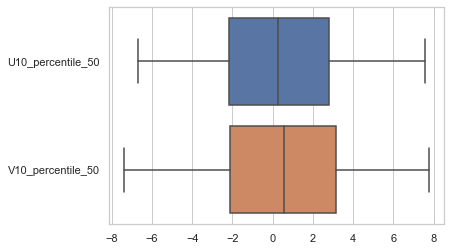

In [91]:
#Plot horizontally oriented boxplot
sns.boxplot(data=filtered_data,orient="h")

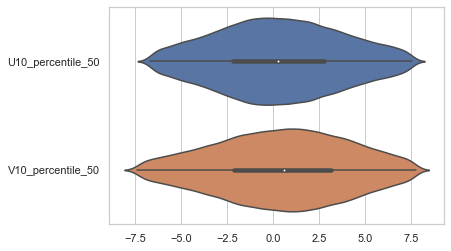

In [92]:
#Plot horizontally oriented violinplot
sns.violinplot(data=filtered_data,orient="h")

***How to handle outliers and subset data using xarray***

In [98]:
#Dask can be finicky with data arrays, use .load() function to avoid issues
u_10_meter = u_10_meter.load()

#Find the upper and lower quantiles across every patch
upper_q = u_10_meter.quantile(0.95,dim=('p','row','col')).values
lower_q = u_10_meter.quantile(0.05,dim=('p','row','col')).values

print('Upper quantile: \n'+ str(upper_q))
print('\nLower quantile: \n' + str(lower_q))

Upper quantile: 
5.1227899312973015

Lower quantile: 
-10.937298774719238


In [107]:
print('Max value of dataset with outliers:', u_10_meter.max().values)
print('Min value of dataset with outliers:', u_10_meter.min().values)

#Subset xarray variable between upper and lower quantiles
no_outlier_xarray = u_10_meter.where((u_10_meter < upper_q) & 
                                    (u_10_meter > lower_q),
                                    drop=True) 

print('\nMax value of dataset with no outliers:', no_outlier_xarray.max().values)
print('Min value of dataset with no outliers:', no_outlier_xarray.min().values)

Max value of dataset with outliers: 20.286409378051758
Min value of dataset with outliers: -18.771434783935547

Max value of dataset with no outliers: 5.122779846191406
Min value of dataset with no outliers: -10.937295913696289


<br>
<br>
<br>

## Normalization and Scaling

When predicting with multiple variables on different scales, a trained model will emphasize variables that have higher ranges in variance. If the predictor variables are not normalized, then a model will underscore variables like temperature (varying from $\sim$180-330 K) while ignoring specific humidity (varying from $\sim$0-0.02 kg kg$^{-1}$).
 
**We will be looking at different sklearn.preprocessing packages to standardize our data. More information about sklearn will be provided in the next lecture.**

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [116]:
#Define pandas dataframe variables we will scale
dataframe = csv_all_files.loc[:,['U10_percentile_50','V10_percentile_50']]

#Define xarray dataset variables we will scale
dataset = mxf['U10_curr'][0,:,:]

***MinMaxScaler***

Scalar = $\frac{x_{i} - min(x)}{max(x) - min(x)}$

Transforms predictor features to lie between 0 and 1 based on the given the maximum and minimum values.

In [117]:
from sklearn.preprocessing import MinMaxScaler

#Scale csv data 
scaled_csv_data = MinMaxScaler().fit_transform(dataframe)
print('Max csv value:',scaled_csv_data.max(),', Min csv value:',scaled_csv_data.min())

#Scale nc data
scaled_nc_data = MinMaxScaler().fit_transform(dataset)
print('Max nc value:',scaled_nc_data.max(),', Min nc value:',scaled_nc_data.min())

Max csv value: 1.0 , Min csv value: 0.0
Max nc value: 1.0000001 , Min nc value: 0.0


***MaxAbsScaler***

Scalar = $\frac{x_{i}}{abs(max(x))}$

Transforms the predictor features given the absolute maximum value, with scaled values ranging from -1 to 1. e absolute values of the predictor features, ranging between -1 and 1. This scalar does not shift or center data, and therefore does not destroy any data sparsity. 

In [118]:
from sklearn.preprocessing import MaxAbsScaler

#Scale csv data
scaled_csv_data = MaxAbsScaler().fit_transform(dataframe)
print('Max csv value:',scaled_csv_data.max(),', Min csv value:',scaled_csv_data.min())

#Scale nc data
scaled_nc_data = MaxAbsScaler().fit_transform(dataset)
print('Max nc value:',scaled_nc_data.max(),', Min nc value:',scaled_nc_data.min())

Max csv value: 1.0 , Min csv value: -1.0
Max nc value: 1.0 , Min nc value: -1.0


***StandardScaler***

Scalar = $\frac{x_{i}-mean(x)}{stdev(x)}$

Transforms the predictor features given the calculated mean and standard deviation. Assumes the data are normally distributed to center the data near 0 with unit variance.  

In [122]:
from sklearn.preprocessing import StandardScaler

#Scale csv data
standard_scaled_csv_data = StandardScaler().fit_transform(dataframe)
print('Mean csv value:',standard_scaled_csv_data.mean(),', Standard Deviation csv value:',standard_scaled_csv_data.std())

#Scale nc data
standard_scaled_nc_data = StandardScaler().fit_transform(dataset)
print('Mean nc value:',standard_scaled_nc_data.mean(),', Standard Deviation nc value:',standard_scaled_nc_data.std())

Mean csv value: -1.1261976544403382e-17 , Standard Deviation csv value: 1.0
Mean nc value: 3.7252903e-09 , Standard Deviation nc value: 1.0


***RobustScaler***

Scalar = $\frac{x_{i} - Q_{1}(x)}{Q_{3}(x) - Q_{1}(x)}$

Scaling based on the mean and variance can be problematic if the data contain outliers. Instead of removing outliers, RobustScalar scales the data based on the interquartile range with a median of 0. The decreases the amount of data used for scaling, but can be useful if there are multiple outliers.  

In [129]:
from sklearn.preprocessing import RobustScaler

#Scale csv data
scaled_csv_data = RobustScaler().fit_transform(dataframe)
print('Median csv value:',np.median(scaled_csv_data))

#Scale nc data
scaled_nc_data = RobustScaler().fit_transform(dataset)
print('Median nc value:',np.median(scaled_nc_data))

Median csv value: 0.0
Median nc value: 0.0


***Normalizer***

If features are in $x,y,z$ cartesian space:

normalizer = $\frac{x_{i}}{  {  \sqrt{{x_i}^2+{y_i}^2+{z_i}^2}}}$

Transforms data by scaling predictor **samples** rather than features (row-wise instead of column-wise). Divides each row by the magnitude of n-dimensional features. This scales each sample to have unit norm. space for n number of features. Normalization is the process of scaling individual samples to have unit norm.

In [131]:
from sklearn.preprocessing import Normalizer
from scipy.linalg import norm

#Normalize csv data
normalized_csv_data = Normalizer().fit_transform(dataframe)
print('One row csv data norm:',norm(normalized_csv_data[0],ord=2))

#Normalize nc data
normalized_nc_data = Normalizer().fit_transform(dataset)
print('One row nc data norm:',norm(normalized_nc_data[0],ord=2))

One row csv data norm: 1.0
One row nc data norm: 1.0


***QuantileTransformer***

Transforms each **feature** independently based on a non-linear function such the features probability density function is mapped to a uniform distribution. This transformer is useful when outliers are present, similar to RobustScalar, however QuantileTransformer will collapse outliers to the distribution range rather than preserve them. 

In [133]:
from sklearn.preprocessing import QuantileTransformer

#Transform csv data
transformed_csv_data = QuantileTransformer(output_distribution='normal').fit_transform(dataframe)
print('Mean csv value:',transformed_csv_data.mean(),', Standard Deviation csv value:',transformed_csv_data.std())

# Transform nc data
transformed_nc_data = QuantileTransformer(output_distribution='normal').fit_transform(dataset)
print('Mean nc value:',transformed_nc_data.mean(),', Standard Deviation nc value:',transformed_nc_data.std())

Mean csv value: 0.0007242068916310013 , Standard Deviation csv value: 0.9987058314349129
Mean nc value: -3.9115548e-08 , Standard Deviation nc value: 1.5659415


C:\Users\aburk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (32). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


***PowerTransformer***

Transforms each feature to a gaussian distribution, similar to QuantileTransformer, using parametric, monotonic transformations. Also scales data to a 0 mean and unit variance after transformation. 

In [135]:
from sklearn.preprocessing import PowerTransformer

#Transform csv data
transformed_csv_data = PowerTransformer().fit_transform(dataframe)
print('Mean csv value:',transformed_csv_data.mean(),', Standard Deviation csv value:',transformed_csv_data.std())

# Transform nc data
transformed_nc_data = PowerTransformer().fit_transform(dataset)
print('Mean nc value:',transformed_nc_data.mean(),', Standard Deviation nc value:',transformed_nc_data.std())

Mean csv value: 1.8769960907338968e-17 , Standard Deviation csv value: 0.9999999999999999
Mean nc value: 0.0 , Standard Deviation nc value: 1.0


<br>
<br>
<br>

## Dimensionality Reduction 

**Why perform dimensionality reduction?**
* Less space is required to store data with reduced dimensions
* Running models is more computationally efficient on less dimensions
* Some models do not perform well on dimensionally large datasets
* Remove redundant features 
* Better visualization in lower dimensional space

***Principal Component Analysis (PCA)***

PCA reduces the dimensionality of a dataset by extracting new features that are linear combinations of the original predictor variables. The new features encompass a desired amount of variance of the predictor dataset (usually 85% variance or higher).

The *principal components (PCs)* output from the algorithm are linearly independent and uncorrelated, which can be beneficial for certain model assumptions. Scaling before PCA is recommended, so that the variables with the greatest explained variance of a dataset are not emphasized on features with large ranges.  The first PC contains the most variance within the scaled data, the second (orthogonal to the first) explains the next most variance, and so on and so forth. 

For more information:

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

<img src="Images/pca.gif" width="350" align="left">

https://giphy.com/gifs/pca-KRpGtfuxQgCEo

<img src="Images/PCAexample.png" width="600" align="left">

https://ourcodingclub.github.io/img/PCAexample.png 

**How to determine how many variables are needed to explain 85% variance?**

Before PCA: 
[ 2.281147    1.6145438   0.13652939  0.3488281   1.7787699   2.665733
  2.0448763  -1.1826547  -3.3957396  -2.70342   ]
After PCA: 
[-0.6934959  6.2397842 -2.059066  -1.6571307 -1.2696235  2.0348175
  1.022995   1.3560362  1.3496971 -0.1047691]


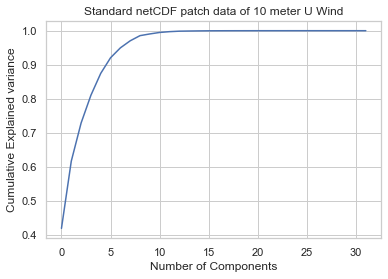

In [136]:
from sklearn.decomposition import PCA

print('Before PCA: \n' + str(standard_scaled_nc_data[0,:10]))

#Fit the PCA model with the already scaled data
pca_nc_model = PCA().fit(standard_scaled_nc_data)

#Plot the cumulutive sum of the explained variance ratio 
plt.plot(np.cumsum(pca_nc_model.explained_variance_ratio_))
plt.title('Standard netCDF patch data of 10 meter U Wind')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.grid(True)
#If more than two components are wanted, fit the model again and then transform

#Otherwise transform the desired data using a fitted PCA model
pca_nc_data = pca_nc_model.transform(standard_scaled_nc_data)

print('After PCA: \n' + str(pca_nc_data[0,:10]))

<br>
<br>
<br>

# 6. Tutorial Data Preparation

**The functions to extract the csv and netCDF data can be found at .../util/extract_data.py**

In [137]:
# Input variables for the extract_csv_data() function
csv_input_variables = ['REFL_COM_mean', 'REFL_COM_max', 'REFL_COM_min', 'REFL_COM_std', 'REFL_COM_percentile_10', 
'REFL_COM_percentile_25', 'REFL_COM_percentile_50', 'REFL_COM_percentile_75', 'REFL_COM_percentile_90', 
'U10_mean', 'U10_max', 'U10_min', 'U10_std', 'U10_percentile_10', 'U10_percentile_25', 'U10_percentile_50', 
'U10_percentile_75', 'U10_percentile_90', 'V10_mean', 'V10_max', 'V10_min', 'V10_std', 'V10_percentile_10', 
'V10_percentile_25', 'V10_percentile_50', 'V10_percentile_75', 'V10_percentile_90', 'T2_mean', 'T2_max', 
'T2_min', 'T2_std', 'T2_percentile_10', 'T2_percentile_25', 'T2_percentile_50', 'T2_percentile_75', 
'T2_percentile_90', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'orientation']

# Label variable for the extract_csv_data() function
csv_label_variable = ['RVORT1_MAX-future_max'] 

# Input variables for the extract_nc_data() function
nc_input_variables = ["REFL_COM_curr", "U10_curr", "V10_curr"]

# Label variable for the extract_nc_data() function
nc_label_variable = ["RVORT1_MAX_future"]

In [138]:
# Find all csv files from a given directory
# The input_data_path variable needs to be specified
input_data_path = csv_path
data_files = sorted(glob(input_data_path + "*.csv"))

#Create empty lists for the predictors, labels, and time data 
in_data = []
out_data = []
valid_times = []

In [139]:
#Loop through each file
for files in data_files:
    # Read in csv data
    data = pd.read_csv(files)
    #Append the predictor and label variables
    in_data.append(data.loc[:,csv_input_variables].values)
    out_data.append(data.loc[:,csv_label_variable].values)
    #Append daily timestamps 
    valid_24_hour_date = data.loc[:,"Valid_Date"].values
    valid_times.append(pd.Timestamp(valid_24_hour_date[0][:10]))

In [140]:
print('Predictor variables shape: ',np.shape(in_data))
print('Label variable shape: ',np.shape(out_data))
print('Valid date variable shape: ',np.shape(valid_times))

Predictor variables shape:  (100,)
Label variable shape:  (100,)
Valid date variable shape:  (100,)


***Reading the netCDF files script***

In [171]:
# The input_data_path variable needs to be specified
input_data_path = nc_path

# Find all netcdf files from given directory
data_files = sorted(glob(input_data_path + "*.nc"))
   
#Only look at first 20 files to save time
data_files = np.array(data_files)[:20]

in_data = []
out_data = []
valid_times = []
    
for f,files in enumerate(data_files):
    if f%5 < 1:
        print('Files extracted:',f)
    elif (f+1) == 20:
        print('All files extracted')
    # Read in netcdf data
    data = xr.open_mfdataset(files,combine='by_coords')
    #Append the daily predictor and label variables 
    in_data.append(np.stack([data[v].values for v in nc_input_variables], axis=-1))
    out_data.append(np.stack([data[v].values for v in nc_label_variable], axis=-1))
    #Append daily timestamps 
    date = pd.Timestamp(files.split("NCARSTORM_")[-1].split("_")[0])
    valid_times.append([date] * in_data[-1].shape[0])
    data.close()

# Concatenate/stack data from lists of arrays to a single array
all_in_data = np.vstack(in_data)
all_out_data = np.vstack(out_data)
all_valid_times = np.concatenate(valid_times)

Files extracted: 0
Files extracted: 5
Files extracted: 10
Files extracted: 15
All files extracted


In [172]:
print('Predictor variables shape',np.shape(in_data))
print('Label variable shape',np.shape(out_data))
print('Valid date variable shape',np.shape(valid_times))

Predictor variables shape (20,)
Label variable shape (20,)
Valid date variable shape (20,)
